# Причины оттока клиентов фитнес-цетра

## Описание работы:

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Индикаторы оттока зависят от специфики отрасли. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Не исключено, что он уехал в отпуск, однако чаще бывает наоборот. Чтобы бороться с оттоком, отдел по работе с клиентами фитнес-центра перевёл в электронный вид множество клиентских анкет. Задача — провести анализ и подготовить план действий по удержанию клиентов.

### Цель: 

* Проанализировать основные признаки, наиболее сильно влияющие на отток клиентов и разработать рекомендации по повышению качества работы с клиентами.

### Задачи: 

* Выделить целевые группы клиентов;

* Предложить меры по снижению оттока;

* Определить другие особенности взаимодействия с клиентам

## Ход работы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

### Загрузка данных

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
df.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.duplicated().sum()

0

* Данные загруженны, пропусков и дубликатов нет.

### Исследовательский анализ данных (EDA)

In [7]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [8]:
df['gender'].unique()

array([1, 0])

In [9]:
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [10]:
df_gb = df.groupby('Churn').mean().reset_index()

In [11]:
df_gb

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [12]:
features = df.columns.drop('Churn')

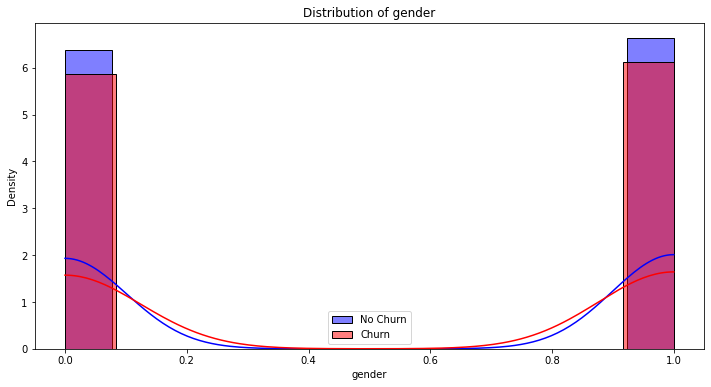

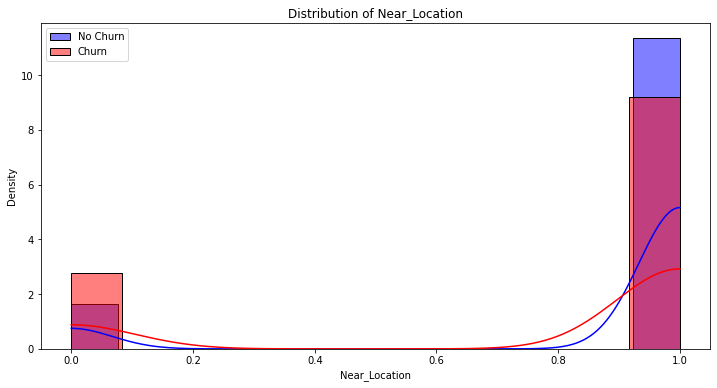

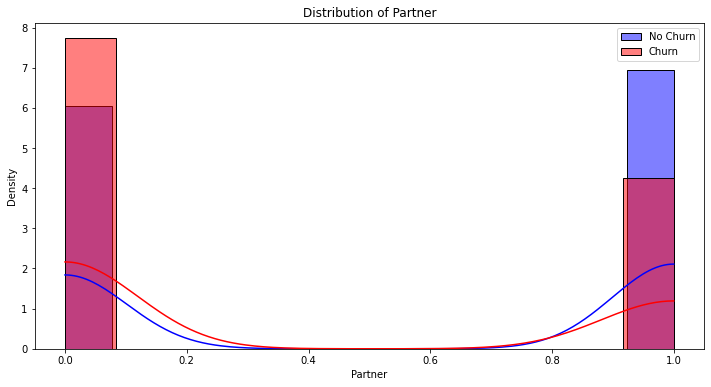

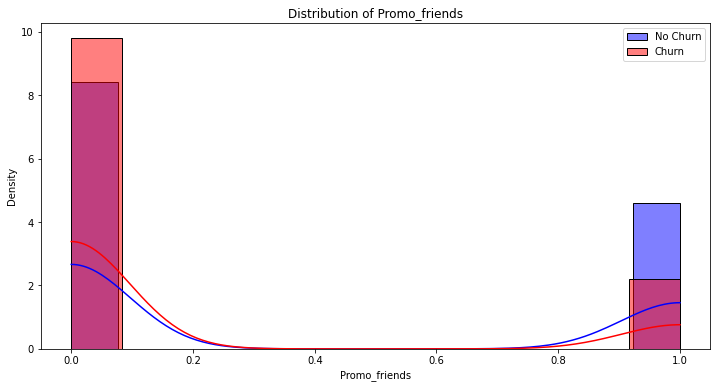

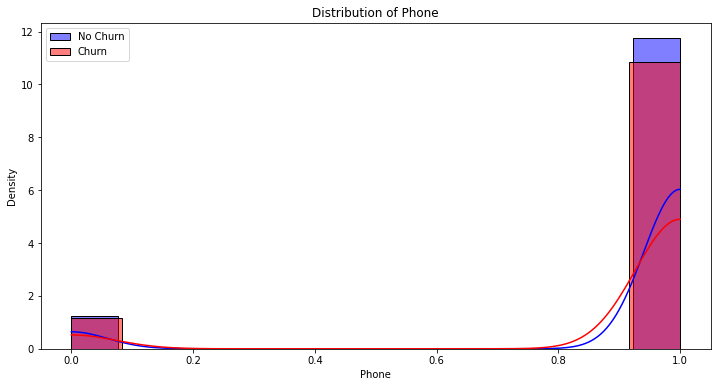

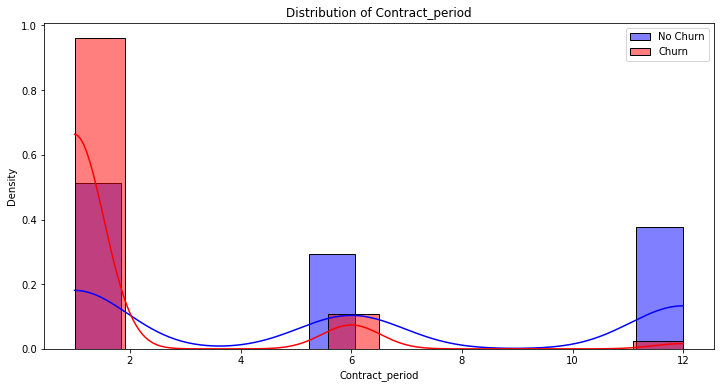

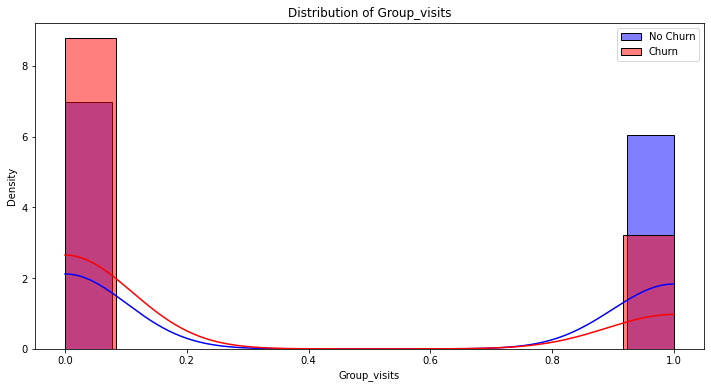

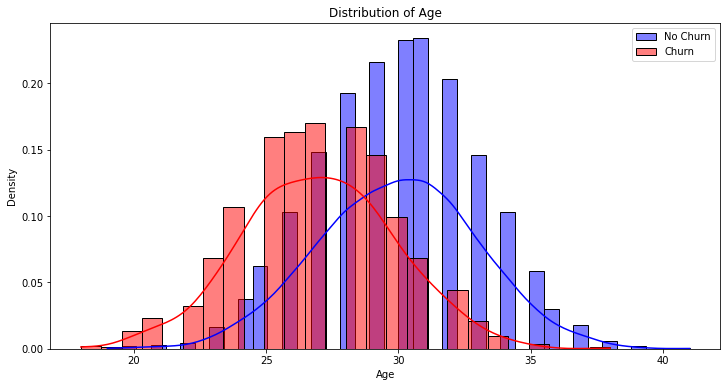

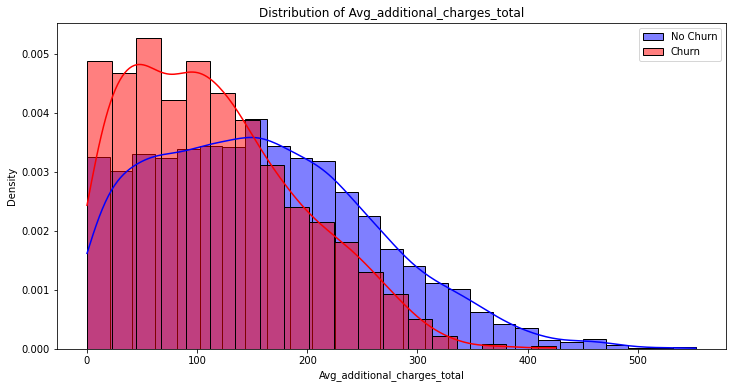

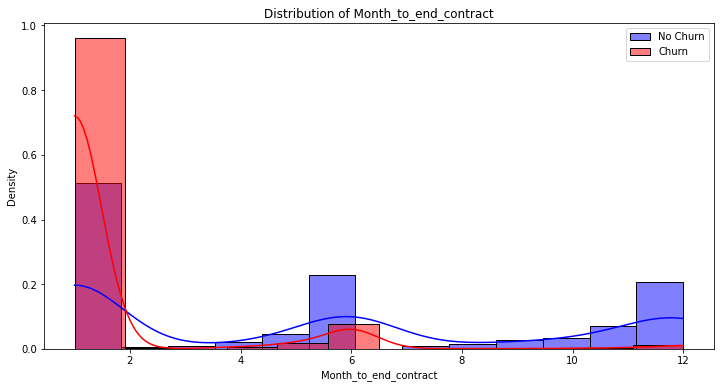

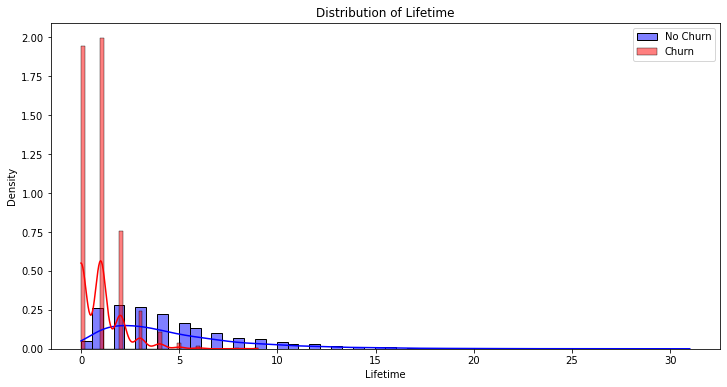

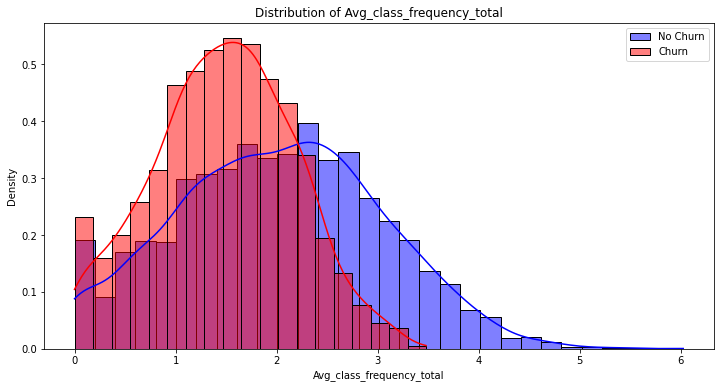

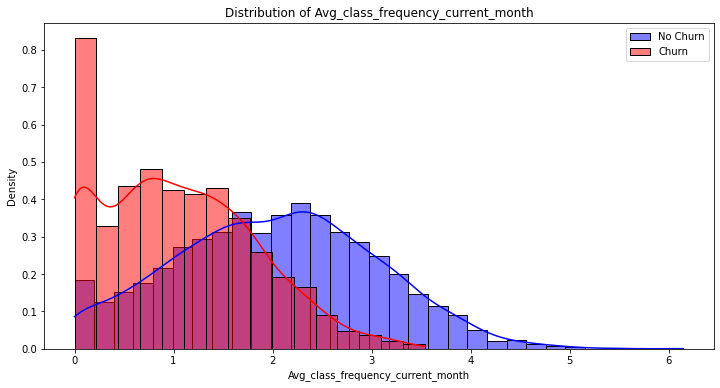

In [13]:
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[df['Churn'] == 0][feature], color='blue', label='No Churn', kde=True, stat="density")
    sns.histplot(df[df['Churn'] == 1][feature], color='red', label='Churn', kde=True, stat="density")
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

* Пол ('gender'): Среднее значение для клиентов, оставшихся в клубе (0.510037), почти идентично клиентам, ушедшим в отток (0.510839), что говорит об отсутствии значимых различий между полами в контексте оттока.

* Живут/работают неподалёку ('Near_Location'): Клиенты, оставшиеся в клубе, чаще живут или работают вблизи фитнес-центра (0.873086), чем те, кто ушел (0.768143). Это может свидетельствовать о важности удобства местоположения в удержании клиентов.

* Партнёрские клиенты ('Partner'): Больше клиентов, которые остались, были сотрудниками компаний-партнёров (0.534195) по сравнению с теми, кто ушел (0.355325). Это указывает на возможную эффективность партнёрских программ для снижения оттока.

* Участвовали в промоакции "приведи друга" ('Promo_friends'): Программа "приведи друга" оказалась более популярной среди оставшихся (0.353522) по сравнению с теми, кто ушел (0.183789), что свидетельствует о её возможной эффективности в удержании клиентов.

* Контактный телефон ('Phone'): Обе группы имеют схожие показатели наличия контактного телефона (0.903709 и 0.902922), что указывает на отсутствие взаимосвязи между наличием телефона и оттоком.

* Период действия контракта ('Contract_period'): Средний период контракта для остающихся клиентов значительно больше (5.747193 месяца), чем для ушедших (1.728558 месяца). Это подчеркивает важность более длительных контрактов в удержании клиентов.

* Посещения групповых занятий ('Group_visits'): Остающиеся клиенты чаще посещают групповые занятия (0.464103), чем ушедшие (0.268615), что подчеркивает важность социального или групповго элемента в фитнес-программах.

* Возраст ('Age'): Средний возраст незначительно выше у остающихся клиентов (29.976523 лет) по сравнению с ушедшими (26.989632 лет), что может быть связано с разной стабильностью или жизненными приоритетами этих возрастных групп.

* Доходы от дополнительных услуг ('Avg_additional_charges_total'): Остающиеся клиенты в среднем больше тратят на дополнительные услуги фитнес-центра (158.445715), чем ушедшие (115.082899), что может показать уровень вовлеченности или удовлетворенности сервисом.

* Срок до окончания контракта ('Month_to_end_contract'): Остающиеся клиенты имеют более долгий срок до окончания текущего контракта (5.283089 месяца) в сравнении с ушедшими (1.662582 месяца), что может указывать на важность контрактных обязательств в удержании клиентов.

* Опыт в фитнес-центре ('Lifetime'): Остающиеся клиенты имеют больший опыт посещения фитнес-центра (4.711807 месяца) по сравнению с ушедшими (0.990575 месяца), что может свидетельствовать о важности наращивания такого опыта для снижения оттока.

* Средняя частота посещений ('Avg_class_frequency_total' и 'Avg_class_frequency_current_month'): Остающиеся клиенты имеют более высокую среднюю частоту посещений за все время (2.024876) и за последний месяц (2.027882) по сравнению с ушедшими, соответственно (1.474995 и 1.044546). Это говорит о значении регулярности в снижении вероятности оттока.

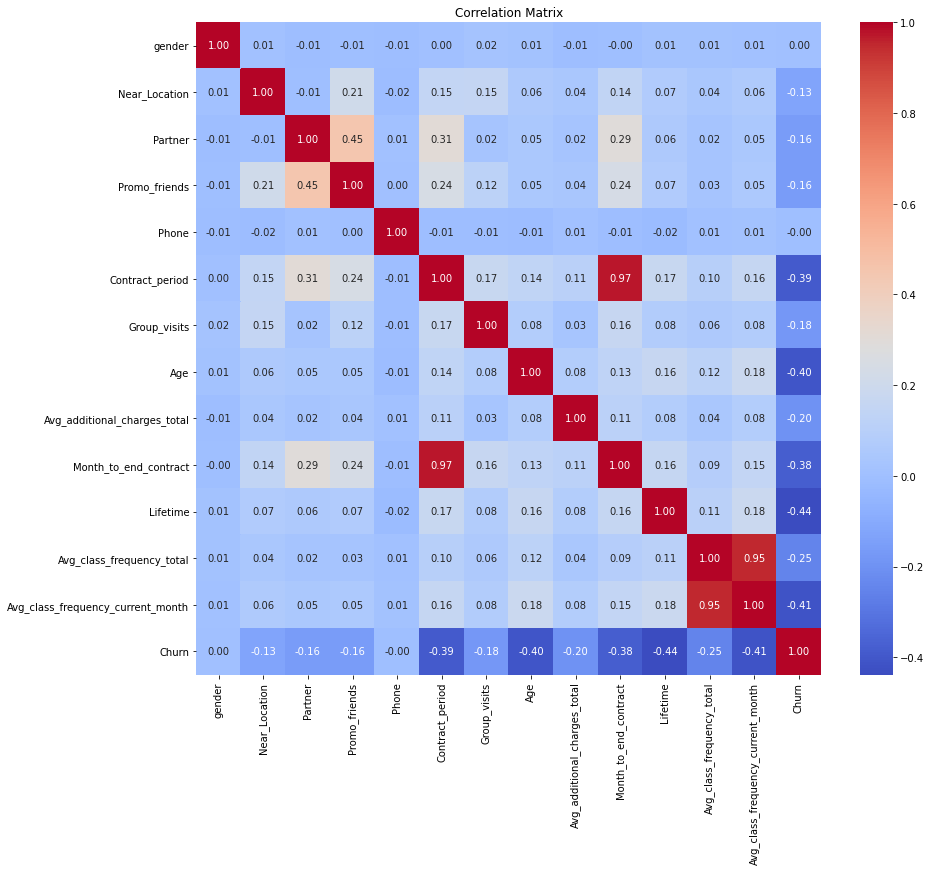

In [14]:
corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* Сильная положительная корреляция:

Пара Avg_class_frequency_total и Avg_class_frequency_current_month демонстрирует высокую положительную корреляцию (0.97). Это указывает на то, что клиенты, часто посещающие фитнес-центр в целом, также активно занимаются и в последний месяц.

* Значимая отрицательная корреляция:

Признак Churn имеет заметные отрицательные корреляции с такими признаками как Lifetime (-0.44) и Avg_class_frequency_current_month (-0.41). Это подтверждает, что больший опыт посещения клуба и высокая частота занятий в последнее время уменьшает вероятность оттока.

* Умеренные корреляции:

Contract_period и Month_to_end_contract также показывают значимо положительные отношения, что логично, так как более длинные контракты обычно подразумевают и большее количество оставшихся месяцев (0.97).

### Модель прогнозирования оттока клиентов

In [15]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Логистическая регрессия
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Предсказания и оценка метрик на валидационной выборке
y_pred_log_reg = log_reg.predict(X_val)
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
precision_log_reg = precision_score(y_val, y_pred_log_reg)
recall_log_reg = recall_score(y_val, y_pred_log_reg)

print(f'''Logistic Regression: 
Accuracy: {accuracy_log_reg:.2f},  
Precision: {precision_log_reg:.2f}, 
Recall: {recall_log_reg:.2f}''')

Logistic Regression: 
Accuracy: 0.92,  
Precision: 0.87, 
Recall: 0.78


In [18]:
# Случайный лес
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)

# Предсказания и оценка метрик на валидационной выборке
y_pred_rf = rf_clf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)

print(f'''Random Forest: 
Accuracy: {accuracy_rf:.2f}, 
Precision: {precision_rf:.2f}, 
Recall: {recall_rf:.2f}''')

Random Forest: 
Accuracy: 0.91, 
Precision: 0.85, 
Recall: 0.78


* Accuracy (Точность):

Логистическая регрессия показывает немного более высокую точность (0.92) по сравнению со случайным лесом (0.91). Это означает, что логистическая регрессия правильно классифицировала большее количество наблюдений в целом.

* Precision (Точность положительных прогнозов):

Логистическая регрессия также уступает по точности (0.87) по сравнению со случайным лесом (0.85). Это говорит о том, что логистическая регрессия лучше определяет положительные случаи без лишних ошибок.
* Recall (Полнота):

Обе модели имеют одинаковый показатель полноты (0.78), что указывает на их схожую способность выявлять реально положительные случаи оттока.


В итоге, логистическая регрессия немного превосходит случайный лес по точности и точности положительных прогнозов, в то время как оба алгоритма имеют одинаковую полноту. Это говорит о том, что логистическая регрессия может быть предпочтительнее в данном конкретном случае, если для бизнеса важнее минимизировать количество ложноположительных прогнозов среди выявленных оттоков

### Кластеризация клиентов

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

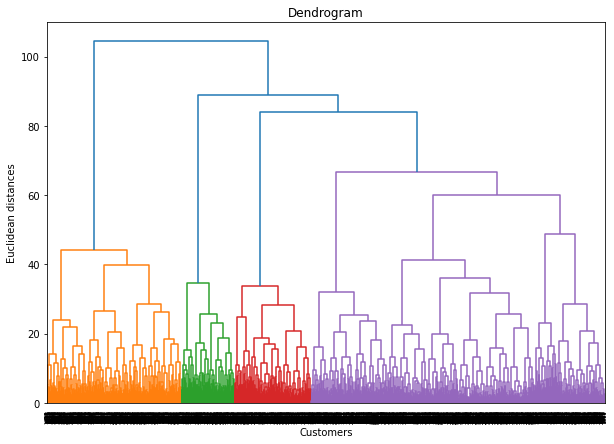

In [20]:
linkage_matrix = sch.linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [21]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [22]:
df['Cluster'] = clusters

cluster_means = df.groupby('Cluster').mean()
cluster_means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


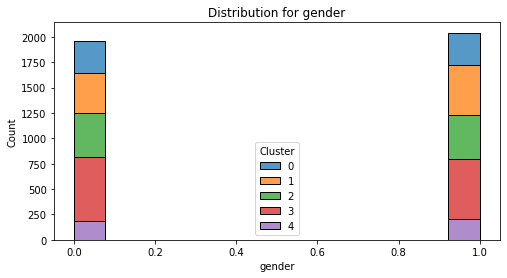

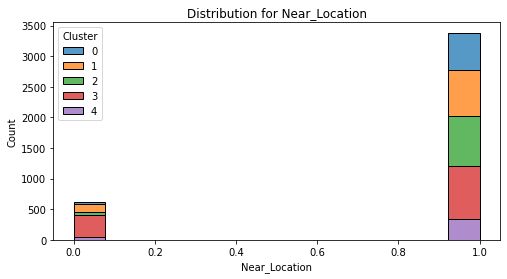

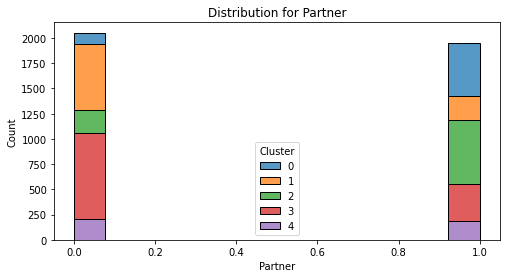

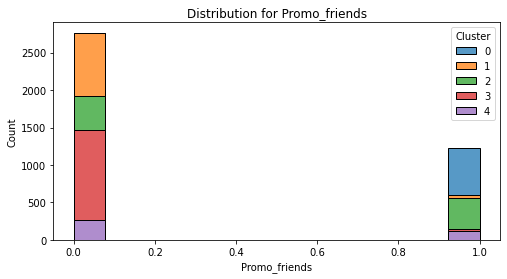

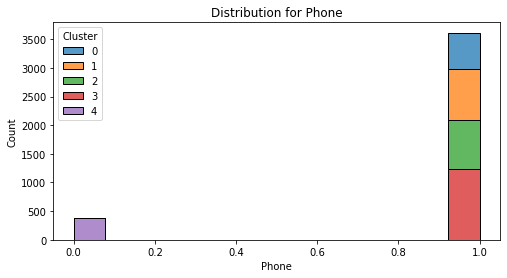

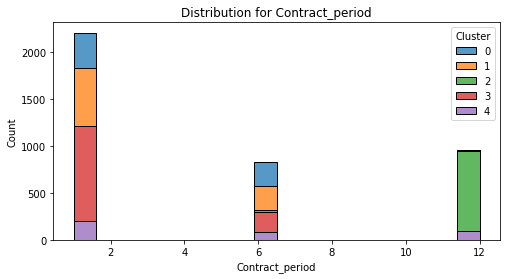

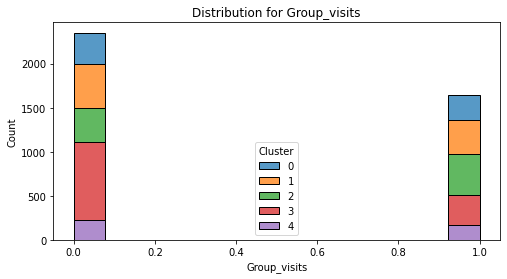

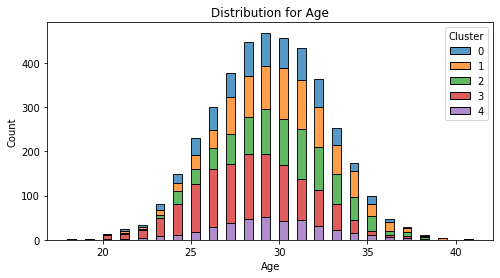

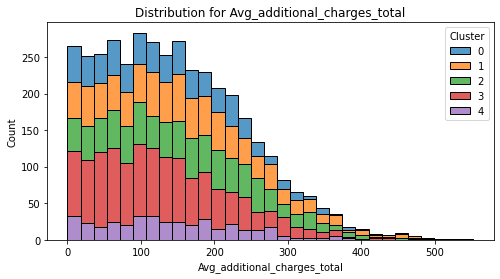

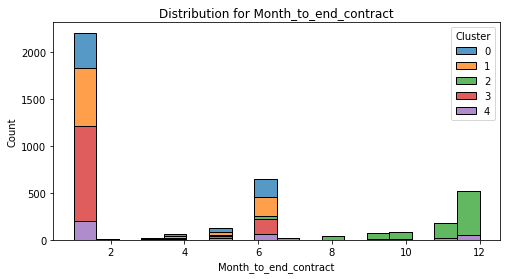

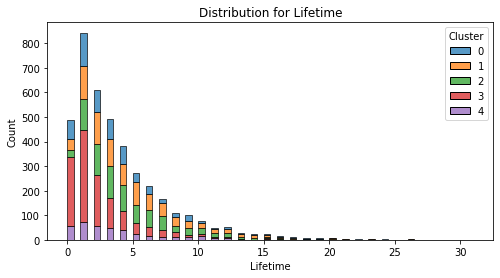

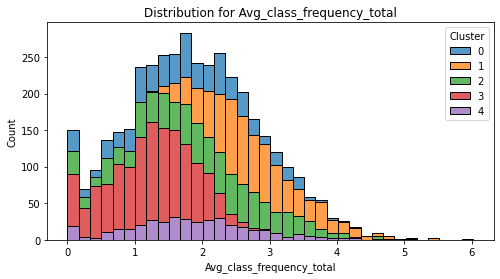

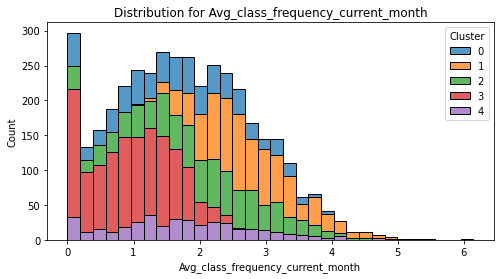

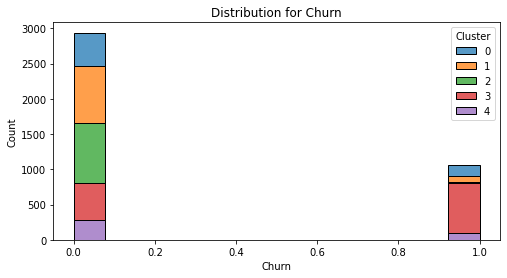

In [23]:
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=column, hue='Cluster', multiple='stack', palette='tab10')
    plt.title(f'Distribution for {column}')
    plt.show()

* Кластер 0:

    * Высокий уровень участия в программе "приведи друга" (почти все).
    * Средний уровень оттока (24.6%).
    * Проживают вблизи фитнес-центра (0.95) и часто являются партнёрскими клиентами (0.83).

* Кластер 1:

    * Низкий уровень участия в партнёрских программах и акциях.
    * Самый низкий уровень оттока (8.9%).
    * Относительно высокая средняя частота посещений.

* Кластер 2:

    * Длительные контракты (в среднем почти 12 месяцев).
    * Очень низкий уровень оттока (2.2%).
    * Высокие расходы на дополнительные услуги.

* Кластер 3:

    * Высокий уровень оттока (57.3%).
    * Низкая средняя частота посещений.
    * Наименьшая продолжительность контрактов и срока до окончания.

* Кластер 4:

    * Средние показатели участия в промоакциях и партнёрских программах.
    * Сравнительно высокий уровень оттока (26.7%).
    * Средняя продолжительность контракта и частота посещений.


* Общие выводы:

    * Кластеры с более длительными контрактами (Кластер 2) и высоким участием в партнерских программах показывают низкий уровень оттока.
    * Кластер 3, с низкой частотой посещений и короткими контрактами, наиболее подвержен оттоку.

In [24]:
churn_rate_by_cluster = df.groupby('Cluster')['Churn'].mean()

churn_rate_by_cluster

Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64

* Кластер 2:

    * Самая низкая доля оттока (2.2%).
    * Клиенты, вероятно, имеют более длительные контракты и большую вовлеченность, что способствует удержанию.

* Кластер 1:
 
    * Низкий уровень оттока (9%).
    * Возможно, группа с регулярными посещениями и хорошей вовлеченностью.

* Кластер 0 и 4:

    * Уровень оттока умеренный (около 24.6% и 26.7% соответственно).
    * Требуется улучшение в удержании, возможно, через программы лояльности.

* Кластер 3:

    * Высокий уровень оттока (57.3%).
    * Клиенты, вероятно, имеют краткосрочные контракты и низкую частоту посещений. Необходимо разрабатывать специальные стратегии, чтобы уменьшить отток в этой группе.

* Заключение:

    * Усилия следует сосредоточить на улучшении удержания в Кластере 3 путем продвижения более длительных контрактов и увеличения частоты посещений.
    * Для кластеров с умеренным оттоком можно развивать программы лояльности и акций для укрепления клиентских отношений.

## Основные выводы

* Длительные контракты и вовлеченность: Клиенты с более длительными контрактами и высокой частотой посещений склонны к меньшему оттоку.

* Партнёрские программы: Участие в партнёрских программах способствует снижению уровня оттока.

* Промоакции и реферальные программы: Программы типа "приведи друга" оказывают положительное воздействие на удержание клиентов.

* Высокий отток в определённых кластерах: Некоторые кластеры, особенно с короткими контрактами и низкой посещаемостью, склонны к высокому уровню оттока.


### Рекомендации

* Продвижение длительных контрактов:
* Программы лояльности: Предлагайте скидки или бонусы для клиентов, заключающих долгосрочные контракты (6-12 месяцев).
* Персонализированное предложение: Автоматически напоминать клиентам с короткими контрактами о преимуществах продления на более длительный срок вместе с предложением поощрительных скидок.
* Развитие партнерских программ:
* Корпоративные предложения: Продвигайте корпоративные абонементы с компаниями-партнёрами, предоставляя сотрудникам этих компаний особые условия.
* Кросспродажи: Организуйте совместные акции с партнёрами (например, скидки в фитнес-центре для покупателей определённых продуктов).
* Активизация участия в промоакциях:
    * Реферальные программы: Усовершенствуйте программы "приведи друга" с целью привлечения новых членов и поддержания интереса текущих клиентов.
    * Сезонные акции: Внедрение специальных предложений в ключевые периоды (например, январь и сентябрь) для максимального привлечения новых клиентов.
* Увеличение посещаемости:
    * Групповые челленджи: Организуйте соревнования или челленджи с соответствующими наградами для повышения вовлеченности и мотивации.
    * Персональные уведомления и мотивация: Используйте данные для отправки персонализированных напоминаний и мотивационных сообщений клиентам с низкой частотой посещений.